# CRD : Cycloidal Reducer Designer

## Ref.

* DETERMINATION OF REAL CLEARANCES BETWEEN CYCLOIDAL SPEED REDUCER ELEMENTS BY THE APPLICATION OF HEURISTIC OPTIMIZATION
  - https://doi.org/10.21278/TOF.42102


## Notation

_Where :_

$R_a$ : the radius of the rolling circle

$R_b$ : the radius of the base circle

$\alpha$ : the angular position of the starting contact point and the current contact point of the base and the rolling circle in relation to the centre of the base circle

$\beta$ : the swivel angle of the rolling circle

$e$ : eccentricity

$q$ : the radius of the ring gear roller – equidistant distance

$\phi$ : the auxiliary angle


$ \beta = \frac{R_b}{R_a} \alpha $

$ \phi = atan \left( \frac{sin(\beta)}{\frac{R_a}{e} cos(\beta)} \right) $


$ x_c = (R_b + R_a) \cdot cos(\alpha) + e \cdot cos(\alpha + \beta) - q \cdot cos ( \alpha + \phi ) $

$ y_c = (R_b + R_a) \cdot sin(\alpha) + e \cdot sin(\alpha + \beta) - q \cdot sin ( \alpha + \phi ) $

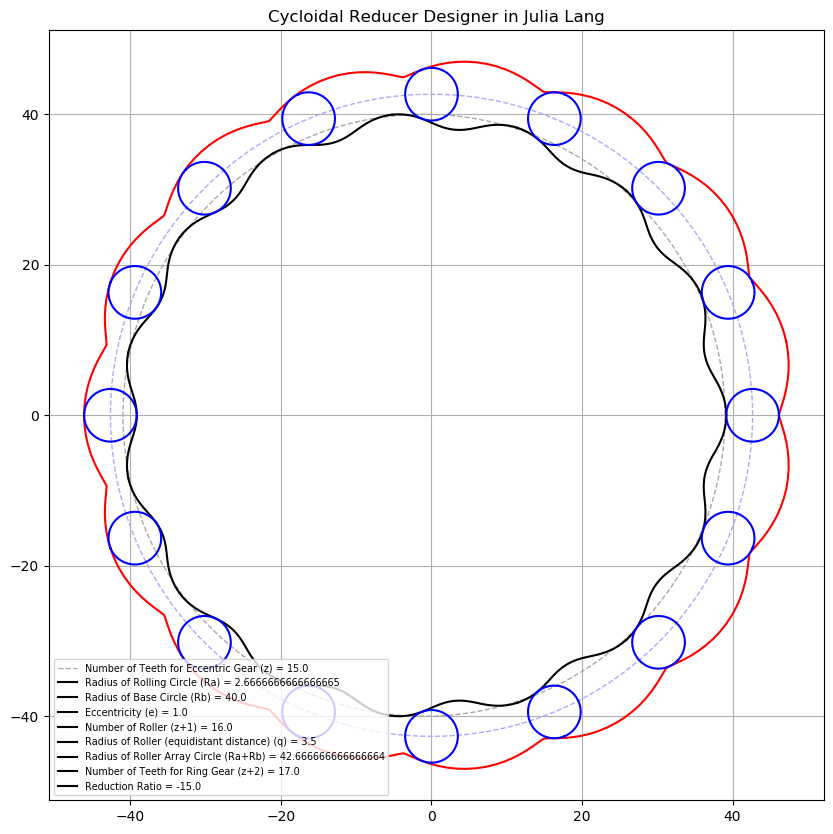

In [25]:
## DETERMINATION OF REAL CLEARANCES BETWEEN CYCLOIDAL SPEED REDUCER ELEMENTS BY THE APPLICATION OF HEURISTIC OPTIMIZATION
# https://doi.org/10.21278/TOF.42102

using PyPlot
PyPlot.svg(true)

##############################################################################################
## Parameters
z = 15.00;    # Number of Teeth for Eccentric Gear
Rb = 40.00;   # Radius of Base Circle
e = 1.00;     # Eccentricity
q = 3.50;     # Radius of Roller (equidistant distance)
Ra = Rb/z;    # Radius of Rolling Circle

##############################################################################################
## Control Points
point = 360.0;
alpha = [0.0:deg2rad(360.0/point):(2*pi);];

##############################################################################################
## Calculate for Eccentric Gear
thetaE = deg2rad(360.0/z);
pointE = 100.0;
alphaE = [0.0:(thetaE/pointE):thetaE;];
beta = (Rb/Ra).*alphaE;
phi = atan.( sin.(beta) ./ ((Ra/e).+cos.(beta)) );
Xc = (Rb+Ra).*cos.(alphaE) .+ e.*cos.(alphaE.+beta) .- q.*cos.(alphaE.+atan.(phi));
Yc = (Rb+Ra).*sin.(alphaE) .+ e.*sin.(alphaE.+beta) .- q.*sin.(alphaE.+atan.(phi));

##############################################################################################
## Calculate for Roller
thetaP = deg2rad(360.0/(z+1));    # Array Angle of Ring Gear Roller
pointP = 360.0;
alphaP = [0.0:(2*pi/pointP):(2*pi);];
P = hcat( q.*cos.(alphaP).+(Rb+Ra), q.*sin.(alphaP) );
i=1;
for i=1:floor(Int64,z+1)
    P = hcat(P, P[:,2*i-1].*cos(thetaP).-P[:,2*i].*sin(thetaP) );
    P = hcat(P, P[:,2*i-1].*sin(thetaP).+P[:,2*i].*cos(thetaP) );
end

##############################################################################################
## Calculate for Ring Gear
thetaR = deg2rad(360.0/(z+2));
pointR = 100.0;
#alphaR = [0.0:(thetaR/pointR):thetaR;];
alphaR = alpha;
RaR = Ra;      # Radius of Rolling Circle
RbR = Rb;
betaR = (RbR/RaR).*alphaR;
thetaRotate = deg2rad(360.0/z)/2;
phiR = atan.( sin.(betaR) ./ ((RaR/e).+cos.(betaR)) );
XcR = (RbR+RaR).*cos.(alphaR) .+ e.*cos.(alphaR.+betaR) .+ q.*cos.(alphaR.+atan.(phiR));
YcR = (RbR+RaR).*sin.(alphaR) .+ e.*sin.(alphaR.+betaR) .+ q.*sin.(alphaR.+atan.(phiR));
XcR2 = XcR.*cos(thetaRotate).-YcR.*sin(thetaRotate);
YcR2 = XcR.*sin(thetaRotate).+YcR.*cos(thetaRotate);
XcR2 = XcR2 .+ e;

##############################################################################################
## Plot
f=figure(figsize=(10,10))
grid("on")
axis("equal")
title("Cycloidal Reducer Designer in Julia Lang")
# Eccentric Gear
plot( Rb.*cos.(alpha).-e, Rb.*sin.(alpha), color="#aaaaaa", linewidth="1", linestyle="--" )
for i=1:floor(Int64,z)
    Xc2 = Xc.*cos(i*thetaE).-Yc.*sin(i*thetaE);
    Yc2 = Xc.*sin(i*thetaE).+Yc.*cos(i*thetaE);
    plot(Xc2.-e, Yc2, color="#000000", linewidth="1.5")
end
# Ring Gear
plot(XcR2, YcR2, color="#ff0000", linewidth="1.5")
# Rollers
plot( (Rb+Ra).*cos.(alpha), (Rb+Ra).*sin.(alpha), color="#aaaaff", linewidth="1", linestyle="--" )
for i=1:floor(Int64,z)+1
    plot(P[:,2*i-1],P[:,2*i],color="#0000ff",linewidth="1.5")
end
# Annotation
legend(["Number of Teeth for Eccentric Gear (z) = $z",
        "Radius of Rolling Circle (Ra) = $Ra",
        "Radius of Base Circle (Rb) = $Rb",
        "Eccentricity (e) = $e",
        "Number of Roller (z+1) = $(z+1)",
        "Radius of Roller (equidistant distance) (q) = $q",
        "Radius of Roller Array Circle (Ra+Rb) = $(Ra+Rb)",
        "Number of Teeth for Ring Gear (z+2) = $(z+2)",
        "Reduction Ratio = $(z/(-1))"], loc="lower left", fontsize="x-small")
savefig("case.svg")

##############################################################################################
## Save case.scr
fileout = open("case.scr", "w")
# Eccentric Gear
println(fileout, "spline")
for i=1:floor(Int64,length(Xc))
    println(fileout, Xc[i].-e,",",Yc[i])
end
println(fileout, "")
println(fileout, "")
println(fileout, "")
println(fileout, "array")
println(fileout, "L")
println(fileout, "")
println(fileout, "P")
println(fileout, "-",e,",0")
println(fileout, Int(z))
println(fileout, "360")
println(fileout, "Y")
# Single Tooth Lines for Eccentric Gear
println(fileout, "line")
println(fileout, -e,",0")
println(fileout, Xc[1].-e,",",Yc[1])
println(fileout, "")
println(fileout, "line")
println(fileout, -e,",0")
println(fileout, Xc[length(Xc)].-e,",",Yc[length(Yc)])
println(fileout, "")
# Base Circle for Eccentric Gear
println(fileout, "circle")
println(fileout, "-",e,",0")
println(fileout, Rb)
# Rollers
println(fileout, "circle")
println(fileout, (Rb+Ra),",0")
println(fileout, q)
println(fileout, "array")
println(fileout, "L")
println(fileout, "")
println(fileout, "P")
println(fileout, "0,0")
println(fileout, Int(z)+1)
println(fileout, "360")
println(fileout, "Y")
# Array Circle for Rollers
println(fileout, "circle")
println(fileout, "0,0")
println(fileout, (Rb+Ra))
# Ring Gear
println(fileout, "spline")
for i=1:floor(Int64,length(alpha))
    println(fileout, XcR2[i],",",YcR2[i])
end
println(fileout, "")
println(fileout, "")
println(fileout, "")
close(fileout)

##############################################################################################
## Save case_eccentric_gear.csv
fileout = open("case_eccentric_gear.csv", "w")
for i=1:floor(Int64,z)
    for j=1:floor(Int64,length(Xc))
        temp_Xc = Xc.*cos(i*thetaE).-Yc.*sin(i*thetaE);
        temp_Yc = Xc.*sin(i*thetaE).+Yc.*cos(i*thetaE);
        println(fileout, temp_Xc[j].-e,",",temp_Yc[j],",0.0")
    end
end
close(fileout)

##############################################################################################
## Save case_ring_gear.csv
fileout = open("case_ring_gear.csv", "w")
for i=1:floor(Int64,length(XcR2))
    println(fileout, XcR2[i],",",YcR2[i],",0.0")
end
close(fileout)

##############################################################################################
## Save case_spec.csv
fileout = open("case_spec.csv", "w")
println(fileout, "Number of Teeth for Eccentric Gear (z),",z)
println(fileout, "Radius of Rolling Circle (Ra),",Ra)
println(fileout, "Radius of Base Circle (Rb),",Rb)
println(fileout, "Eccentricity (e),",e)
println(fileout, "Number of Roller (z+1) =,",(z+1))
println(fileout, "Radius of Roller (equidistant distance) (q),",q)
println(fileout, "Radius of Roller Array Circle (Ra+Rb), ", (Ra+Rb))
println(fileout, "Number of Teeth for Ring Gear (z+2), ", (z+2))
println(fileout, "Reduction Ratio,",(z/(-1)))
close(fileout)
